In [4]:
import sys
sys.path.append("/Users/jiang/Desktop/2270/cs227_final_project/data/data") # path to this repository
import py_ts_data

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import datetime
from auto_encoder import AutoEncoder, train_step
from preprocess import augmentation
from tqdm import tqdm

X_train, y_train, X_test, y_test, info = py_ts_data.load_data("GunPoint", variables_as_channels=True)
print("Dataset shape: Train: {}, Test: {}".format(X_train.shape, X_test.shape))

Dataset shape: Train: (50, 150, 1), Test: (150, 150, 1)


In [5]:
def min_max(data, feature_range=(0, 1)):
    """
    implements min-max scaler
    """
    min_v = feature_range[0]
    max_v = feature_range[1]
    max_vals = data.max(axis=1)[:, None, :]
    min_vals = data.min(axis=1)[:, None, :]
    X_std = (data - min_vals) / (max_vals - min_vals)
    return X_std * (max_v - min_v) + min_v

def normalize(data):
    """
    Z-normalize data with shape (x, y, z)
    x = # of timeseries
    y = len of each timeseries
    z = vars in each timeseres
    
    s.t. each array in [., :, .] (i.e. each timeseries variable)
    is zero-mean and unit stddev
    """
    sz, l, d = data.shape
    means = np.broadcast_to(np.mean(data, axis=1)[:, None, :], (sz, l, d))
    stddev = np.broadcast_to(np.std(data, axis=1)[:, None, :], (sz, l, d)) 
    return (data - means)/stddev


(50, 150, 1) (50,)
<class 'numpy.float32'>
<class 'numpy.float32'>
(1550, 150, 1) (1550,)


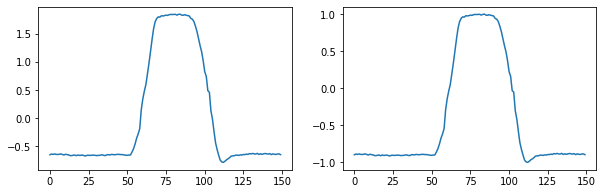

In [6]:
print(X_train.shape, y_train.shape)
X_train, y_train = augmentation(X_train, y_train)
X_test, y_test = augmentation(X_test, y_test)
print(X_train.shape, y_train.shape)
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].plot(X_train[200])
X_train = min_max(X_train, feature_range=(-1, 1))
axs[1].plot(X_train[200])
X_test = min_max(X_test, feature_range=(-1, 1))
plt.show()


# Encode and Decode

In [7]:
kwargs = {
    "input_shape": (X_train.shape[1], X_train.shape[2]),
    "filters": [32, 64, 128],
    "kernel_sizes": [5, 5, 5],
    "code_size": 16,
}

ae = AutoEncoder(**kwargs)

# Training

  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 0: 369.04498291015625


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 1: 196.98475646972656


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 2: 176.97174072265625


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 3: 180.2056884765625


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 4: 186.7285614013672


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 5: 169.0174102783203


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 6: 166.81793212890625


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 7: 167.42787170410156


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 8: 151.2192840576172


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 9: 166.60971069335938


  0%|                                                                      | 0/155 [00:00<?, ?it/s]

Epoch 10: 147.45697021484375


  0%|                                                                      | 0/155 [00:00<?, ?it/s]

Epoch 11: 150.3165740966797


  0%|                                                                      | 0/155 [00:00<?, ?it/s]

Epoch 12: 167.28358459472656


  0%|                                                                      | 0/155 [00:00<?, ?it/s]

Epoch 13: 166.37887573242188


  0%|                                                                      | 0/155 [00:00<?, ?it/s]

Epoch 14: 144.90234375


  1%|▍                                                             | 1/155 [00:00<00:33,  4.66it/s]

Epoch 15: 151.6068878173828


  0%|                                                                      | 0/155 [00:00<?, ?it/s]

Epoch 16: 150.12246704101562


  0%|                                                                      | 0/155 [00:00<?, ?it/s]

Epoch 17: 168.32594299316406


  0%|                                                                      | 0/155 [00:00<?, ?it/s]

Epoch 18: 155.04600524902344


  0%|                                                                      | 0/155 [00:00<?, ?it/s]

Epoch 19: 139.2489013671875


  0%|                                                                      | 0/155 [00:00<?, ?it/s]

Epoch 20: 148.2416534423828


  0%|                                                                      | 0/155 [00:00<?, ?it/s]

Epoch 21: 158.06678771972656


  0%|                                                                      | 0/155 [00:00<?, ?it/s]

Epoch 22: 148.8878936767578


  0%|                                                                      | 0/155 [00:00<?, ?it/s]

Epoch 23: 134.34178161621094


  0%|                                                                      | 0/155 [00:00<?, ?it/s]

Epoch 24: 159.3973388671875


  0%|                                                                      | 0/155 [00:00<?, ?it/s]

Epoch 25: 145.70297241210938


  0%|                                                                      | 0/155 [00:00<?, ?it/s]

Epoch 26: 151.25860595703125


  0%|                                                                      | 0/155 [00:00<?, ?it/s]

Epoch 27: 129.25013732910156


  0%|                                                                      | 0/155 [00:00<?, ?it/s]

Epoch 28: 138.45179748535156


  0%|                                                                      | 0/155 [00:00<?, ?it/s]

Epoch 29: 134.49366760253906


  0%|                                                                      | 0/155 [00:00<?, ?it/s]

Epoch 30: 134.4233856201172


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 31: 132.44338989257812


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 32: 126.28561401367188


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 33: 138.20252990722656


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 34: 139.21043395996094


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 35: 132.5445556640625


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 36: 130.3626708984375


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 37: 152.93478393554688


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 38: 133.13482666015625


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 39: 115.72737121582031


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 40: 132.26856994628906


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 41: 129.22300720214844


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:31,  4.89it/s]

Epoch 42: 113.7791976928711


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 43: 132.27322387695312


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 44: 131.45040893554688


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 45: 132.2776641845703


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 46: 128.9401397705078


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 47: 127.77285766601562


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 48: 119.39888763427734


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 155/155 [00:32<00:00,  4.78it/s]

Epoch 49: 140.61953735351562


NameError: name 'loss_sim' is not defined

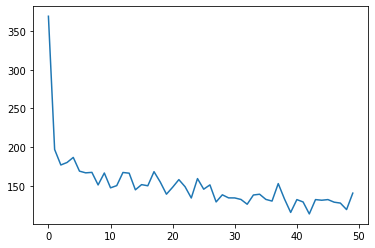

In [9]:
EPOCHS = 50
BATCH = 10
SHUFFLE_BUFFER = 100
K = len(set(y_train))

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER).batch(BATCH)

loss_history = []
sim_history = []
re_history = []

for epoch in range(EPOCHS):
    total_loss = 0
    total_sim = 0
    total_re = 0
#     for i, (input, _) in enumerate(train_dataset):
    for (input, _) in tqdm(train_dataset):
        loss, similarity_loss, reconstruction_loss = train_step(input, ae)
#         if i % 100 == 0:
#             print(loss)
        total_loss += loss
        total_sim += similarity_loss
        total_re += reconstruction_loss
    loss_history.append(total_loss)
    sim_history.append(total_sim)
    re_history.append(total_re)
    print("Epoch {}: {}".format(epoch, total_loss, total_sim, total_re))
#     break

# ae.save('mymodel')
plt.plot(loss_history)
plt.plot(sim_history)
plt.plot(re_history)

# Test

## Evaluate reconstruction

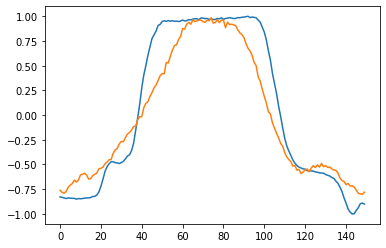

Mean L2 distance: 5.546760082244873


In [10]:
code_test = ae.encode(X_test)
decoded_test = ae.decode(code_test)

plt.plot(X_test[0])
plt.plot(decoded_test[0])
plt.show()

losses = []
for ground, predict in zip(X_test, decoded_test):
    losses.append(np.linalg.norm(ground - predict))
print("Mean L2 distance: {}".format(np.array(losses).mean()))

## Evaluate Similarity

In [11]:
from sklearn.neighbors import NearestNeighbors

def nn_dist(x, y):
    """
    Sample distance metric, here, using only Euclidean distance
    """
    x = x.reshape((45, 2))
    y = y.reshape((45, 2))
    return np.linalg.norm(x-y)

print("000")
nn_x_test = X_test.reshape((-1, 90))
baseline_nn = NearestNeighbors(n_neighbors=10, metric=nn_dist).fit(nn_x_test)
code_nn = NearestNeighbors(n_neighbors=10).fit(code_test)
print("111")

# For each item in the test data, find its 11 nearest neighbors in that dataset (the nn is itself)
baseline_11nn = baseline_nn.kneighbors(nn_x_test, 11, return_distance=False)
code_11nn     = code_nn.kneighbors(code_test, 11, return_distance=False)

# On average, how many common items are in the 10nn?
result = []
for b, c in zip(baseline_11nn, code_11nn):
    # remove the first nn (itself)
    b = set(b[1:])
    c = set(c[1:])
    result.append(len(b.intersection(c)))
    print(result)
np.array(result).mean()

000
111


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[1, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 1, 0, 1, 2, 1, 0, 2, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 3, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 3, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 3, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0,

0.6251612903225806